<h1> New York Taxi Fare Price Prediction </h1>

In this project using <b>New York</b> dataset we will predict the fare price of next trip.

The dataset can be downloaded from https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips

The dataset contains 8 features like pickup lat-lang and drop lat-lang

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('./Dataset/train.csv')
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [2]:
df_test=pd.read_csv('./Dataset/test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.089104e+07,2.089104e+07,2.089104e+07,2.089090e+07,2.089090e+07,2.089104e+07
mean,1.134294e+01,-7.251111e+01,3.992057e+01,-7.251025e+01,3.991853e+01,1.685295e+00
std,1.665903e+01,1.304707e+01,9.525859e+00,1.292337e+01,9.660777e+00,1.322193e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


In [6]:
df.shape

(20891046, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20891046 entries, 0 to 20891045
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtypes: float64(6), object(2)
memory usage: 1.2+ GB


In [8]:
df.isnull().sum()

key                    0
fare_amount            1
pickup_datetime        1
pickup_longitude       1
pickup_latitude        1
dropoff_longitude    147
dropoff_latitude     147
passenger_count        1
dtype: int64

<h1> Data Preprocessing </h1>

<h3> Missing Values </h3>

Above we can see our dataset have minor missing values 147 records maximum.<br>So we can easily drop that data because our dataset is much  larger

Drop column <b> Key </b>also

In [9]:
df=df.dropna()
df=df.drop('key',axis=1)
df.shape

(20890899, 7)

<h3> Let's Check the coordinates data </h3>

First find pickup lat lang min max coordinates

In [10]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())

min_max()

3457.6256829999998 -3439.2450619999995
3406.0083950000003 -3492.263768
3457.62235 -3442.0245649999997
3400.391603 -3547.886698


Latitude is always range between -90 to 90

Longitude is always range between -180 to 180

And whatever above this range is wrong data

First check any data above this range

In [11]:
def coordinate_data():
    print(df[(df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0) ]['pickup_longitude'].count())
    print(df[(df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0) ]['pickup_latitude'].count())
    print(df[(df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0)]['dropoff_longitude'].count())
    print(df[(df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0) ]['dropoff_latitude'].count())

coordinate_data()

398452
397054
397509
396286


We can see so many records are out of range so its not possible to have 
Let's remove it...

We will use <b> ~ </b> sign to remove all data which match condition

In [12]:
df=df[~((df['pickup_longitude']>180) |(df['pickup_longitude']<-180) | (df['pickup_longitude']==0))]
df=df[~((df['pickup_latitude']>90) |(df['pickup_latitude']<-90) | (df['pickup_latitude']==0))]
df=df[~((df['dropoff_longitude']>180) |(df['dropoff_longitude']<-180) | (df['dropoff_longitude']==0))]
df=df[~((df['dropoff_latitude']>90) |(df['dropoff_latitude']<-90) | (df['dropoff_latitude']==0))]

# call function to check
coordinate_data()
min_max()

0
0
0
0
154.10075600000002 -168.603534
89.533332 -77.833874
154.10075600000002 -173.95763
88.75 -74.1932


In [13]:
# remove where pickup and drop location are same
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

(217707, 7)


In [14]:
print(df_test.pickup_latitude.min(), df_test.pickup_latitude.max())
print(df_test.pickup_longitude.min(), df_test.pickup_longitude.max())

40.573143 41.709555
-74.252193 -72.986532


In [15]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [16]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

18043
17749
19416
17715


In [17]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(20226838, 7)

Our system is not capable of proessing <b>20 Millions</b> records.

Processing <b>20 Millions</b> will take lot's of time

I'll select randomly <b>10% </b>dataset and make model

In [19]:
#Randomly select 10% data 

df = df.sample(frac=0.1)
df.shape

(2022684, 7)

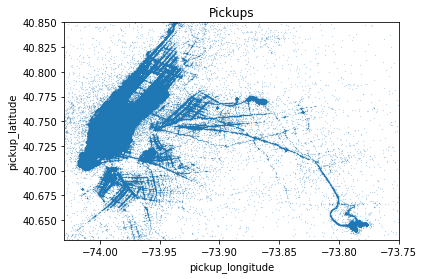

In [20]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

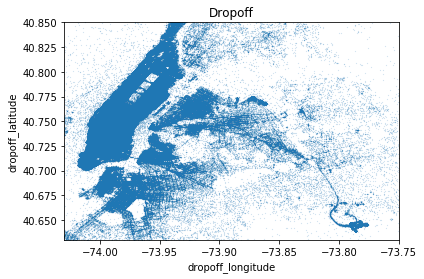

In [21]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [112]:
#JFK Airport Boundary
#-73.85542,40.67530,-73.68513,40.61017

JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
#-74.21059,40.93686,-73.52943,40.67699

#40.89, -73.92 40.77, -73.94
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Staten Island
#-74.35581,40.65356,-73.96992,40.52319

Island={
    "min_long":-74.35,
    "min_lat":40.52,
    "max_long":-73.97,
    "max_lat":40.65 }

#Brooklyn
#-74.04493,40.68272,-73.85439,40.61760

Brooklyn={
    "min_long":-74.04,
    "min_lat":40.59,
    "max_long":-73.94,
    "max_lat":40.73 }

#LibertyAirport

LibertyAirport={
    "min_long":-74.1,
    "min_lat":40.67,
    "max_long":-73.85,
    "max_lat":40.73}

#LaGuardia
# -73.91790,40.79198,-73.82263,40.75948

LaGuardia={
    "min_long":-73.88,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
#-74.18175,40.98042,-73.50060,40.72072

Bronx={
    "min_long":-74.0,
    "min_lat":40.80,
    "max_long":-73.78,
    "max_lat":40.91}


In [115]:

def pickup(place,train):
    data=train[((train['pickup_latitude']>= place['min_lat']) & (train['pickup_latitude']<= place['max_lat']) & (train['pickup_longitude']>= place['min_long']) & (train['pickup_longitude']<= place['max_long']))]
    
    return data

print("JFK Pickup Total " , pickup(JFK,df).shape)
print("Manhattan Pickup Total " , pickup(Manhattan,df).shape)

JFK Pickup Total  (30779, 7)
Manhattan Pickup Total  (1900754, 7)


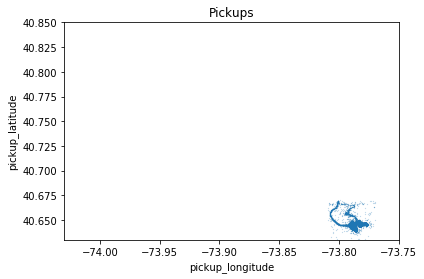

In [116]:
d=pickup(JFK,df)
d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

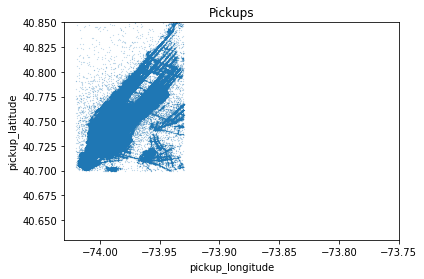

In [117]:
d=pickup(Manhattan,df)
d.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [118]:

def drop_place(place,train):
    data=train[((train['dropoff_latitude']>= place['min_lat']) & (train['dropoff_latitude']<= place['max_lat']) & (train['dropoff_longitude']>= place['min_long']) & (train['dropoff_longitude']<= place['max_long']))]    
    return data

print("JFK Drop Total " ,drop_place(JFK,df).shape)
print("Manhattan Drop Total " , drop_place(Manhattan,df).shape)

JFK Drop Total  (15679, 7)
Manhattan Drop Total  (1841853, 7)


Passenger Count Data

In [151]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

8
0


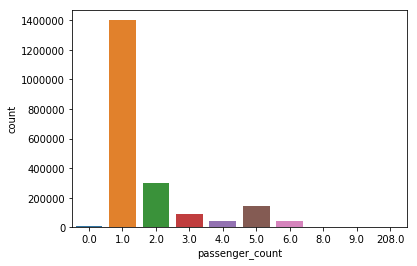

In [128]:
sns.countplot(x='passenger_count',data=df)

In [129]:
df=df[~((df['passenger_count']==0) | (df['passenger_count']>6))]
df.shape

(2015606, 9)

In [137]:
df[df['fare_amount']<=0]['fare_amount'].count()

96

In [138]:
df=df[~(df['fare_amount']<=0)]

<h1>Feature Engineering </h1>

In [139]:
df['pickup_day']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df['pickup_month']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.year
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013


In [140]:
df['pickup_weekday'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0


In [141]:
df['pickup_hour']=pd.to_datetime(df.pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16


In [142]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17,0
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7,0
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14,0
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11,0
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16,0


In [143]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17,0,1
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7,0,0
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14,0,0
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11,0,0
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16,0,1


In [144]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17,0,1,0
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7,0,0,0
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14,0,0,0
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11,0,0,0
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16,0,1,0


In [172]:
df=df.drop('pickup_datetime',axis=1)

In [145]:
#Distance calculator between two pickup and drop coordinates

from geopy.distance import geodesic

def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
6218096,12.9,2009-10-03 17:37:00 UTC,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17,0,1,0,5.920603
6675862,11.5,2014-08-28 07:41:53 UTC,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7,0,0,0,3.459899
15366980,9.7,2010-05-22 14:47:00 UTC,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14,0,0,0,1.846633
6227339,11.5,2015-03-09 11:25:47 UTC,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11,0,0,0,2.085571
20752327,7.5,2013-06-17 16:19:00 UTC,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16,0,1,0,2.097940


In [ ]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

In [ ]:
def place_mapping(lat,lang,place_area,place_name):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return place_name
    return "Other"

In [ ]:
df['pickup_area']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan,"Manhattan"),axis=1)
df['pickup_area']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK,"JFK Airport"),axis=1)


In [ ]:
df['drop_area']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan,"Manhattan"),axis=1)
df['drop_area']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK,"JFK Airport"),axis=1)

In [173]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance
6218096,12.9,-73.999725,40.723740,-73.961787,40.768573,2.0,Other,Other,3,10,2009,5,17,0,1,0,5.920603
6675862,11.5,-73.983010,40.723503,-74.011971,40.701478,1.0,Other,Other,28,8,2014,3,7,0,0,0,3.459899
15366980,9.7,-74.005312,40.740653,-73.998070,40.724963,5.0,Other,Other,22,5,2010,5,14,0,0,0,1.846633
6227339,11.5,-73.988739,40.727539,-74.007751,40.715561,1.0,Other,Other,9,3,2015,0,11,0,0,0,2.085571
20752327,7.5,-73.977525,40.773902,-73.955337,40.782412,6.0,Other,Other,17,6,2013,0,16,0,1,0,2.097940


<h1> Data Visualization </h1>

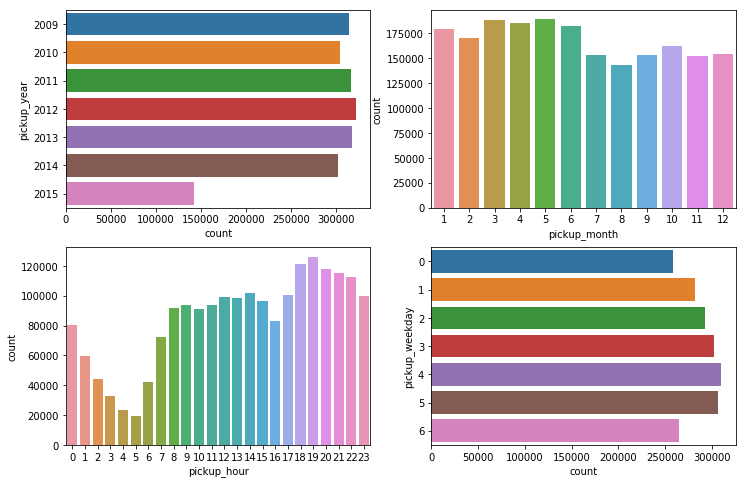

In [147]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df)
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df)
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

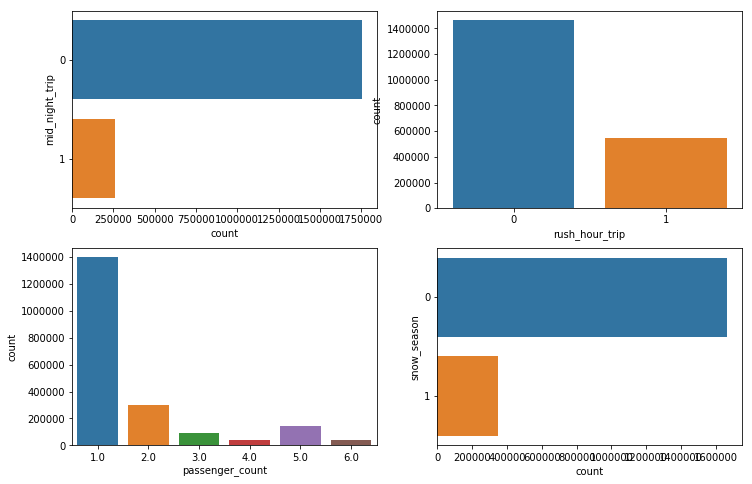

In [171]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df)

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df)

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df)

plt.subplot(2,2,4)
sns.countplot(y='snow_season', data=df)

plt.show()

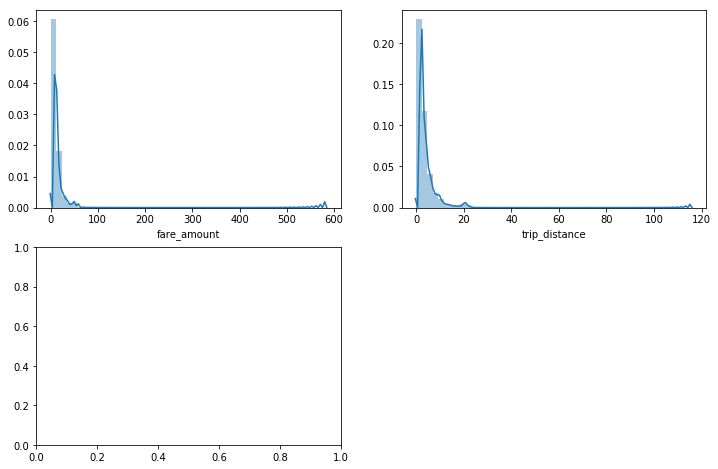

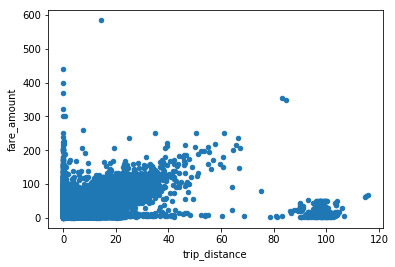

In [174]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

df.plot(x='trip_distance',y='fare_amount',kind='scatter')

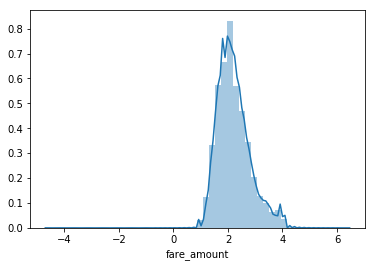

In [194]:
sns.distplot(np.log(df['fare_amount']),kde=True)

In [193]:
np.log(df['fare_amount']).min(),np.log(df['fare_amount']).max()

(-4.605170185988091, 6.369609844561183)

In [195]:
df['fare_amount_log']=np.log(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17352fce860>,
 'caps': [<matplotlib.lines.Line2D at 0x17352fceef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17352fce4e0>],
 'medians': [<matplotlib.lines.Line2D at 0x17352fd85c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17352fd8908>],
 'means': []}

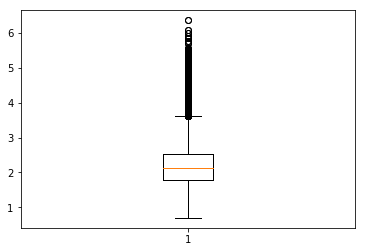

In [205]:
plt.boxplot(df['fare_amount_log'])

df[df['fare_amount_log']<0].count()

df=df[~(df['fare_amount_log']<0)]
plt.boxplot(df['fare_amount_log'])

In [212]:
from sklearn.preprocessing import LabelEncoder

lr=LabelEncoder()
df['pickup_area']=lr.fit_transform(df['pickup_area'])
df['drop_area']=lr.fit_transform(df['drop_area'])

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_area,drop_area,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season,trip_distance,fare_amount_new,fare_amount_log
6218096,12.9,-73.999725,40.723740,-73.961787,40.768573,2.0,1,1,3,10,2009,5,17,0,1,0,5.920603,0.022079,2.557227
6675862,11.5,-73.983010,40.723503,-74.011971,40.701478,1.0,1,1,28,8,2014,3,7,0,0,0,3.459899,0.019681,2.442347
15366980,9.7,-74.005312,40.740653,-73.998070,40.724963,5.0,1,1,22,5,2010,5,14,0,0,0,1.846633,0.016598,2.272126
6227339,11.5,-73.988739,40.727539,-74.007751,40.715561,1.0,1,1,9,3,2015,0,11,0,0,0,2.085571,0.019681,2.442347
20752327,7.5,-73.977525,40.773902,-73.955337,40.782412,6.0,1,1,17,6,2013,0,16,0,1,0,2.097940,0.012829,2.014903


In [214]:
X=df.drop(columns=['fare_amount_log','fare_amount','fare_amount_new'])
y=df['fare_amount_log']

In [215]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

mean_squared_error(y_test,y_pred)

0.12685778249077992